In [1]:
# Importing the necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import shap
import time
from datetime import datetime
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn')
pd.set_option('max_columns', None)

In [2]:
#We proceeed to read the train and test csv using panda
# df = pd.read_csv('train.csv')
# data = np.random.rand(len(df))<=0.7

# train =df[data]
# test = df [~data]

# train.to_csv("train_used.csv", index = False)
# test.to_csv("test_used.csv", index =False)

train = pd.read_csv("train_used.csv")
test = pd.read_csv("test_used.csv")


In [3]:
#listing the first 100 content of the train.csv
train.head(100)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
1,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
2,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
3,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
4,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,NaN,NaN,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,128,NaN,10000000,"[{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...",NaN,tt0219699,en,The Gift,When a local woman disappears and the police c...,7.886926,/mC66QbJk1PbUrVMu3kh14adLpQl.jpg,"[{'name': 'Lakeshore Entertainment', 'id': 126...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/00,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The only witness to the crime was not even there.,The Gift,"[{'id': 663, 'name': 'fortune teller'}, {'id':...","[{'cast_id': 1, 'character': 'Annie Wilson', '...","[{'credit_id': '52fe432fc3a36847f8040ed9', 'de...",12008642
96,129,NaN,18000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.sonypictures.com/homevideo/thefog/i...,tt0432291,en,The Fog,"Trapped within an eerie mist, the residents of...",9.929809,/qZ3Prt6jBvCWI08MsS9cPMM5lMi.jpg,"[{'name': 'Revolution Studios', 'id': 497}, {'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",10/14/05,100.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Their

In [4]:
#Listing information about the data types in the train.csv
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2117 non-null   int64  
 1   belongs_to_collection  419 non-null    object 
 2   budget                 2117 non-null   int64  
 3   genres                 2113 non-null   object 
 4   homepage               670 non-null    object 
 5   imdb_id                2117 non-null   object 
 6   original_language      2117 non-null   object 
 7   original_title         2117 non-null   object 
 8   overview               2110 non-null   object 
 9   popularity             2117 non-null   float64
 10  poster_path            2116 non-null   object 
 11  production_companies   1997 non-null   object 
 12  production_countries   2072 non-null   object 
 13  release_date           2117 non-null   object 
 14  runtime                2115 non-null   float64
 15  spok

In [5]:
#Same as previously but for the test.csv
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     883 non-null    int64  
 1   belongs_to_collection  185 non-null    object 
 2   budget                 883 non-null    int64  
 3   genres                 880 non-null    object 
 4   homepage               276 non-null    object 
 5   imdb_id                883 non-null    object 
 6   original_language      883 non-null    object 
 7   original_title         883 non-null    object 
 8   overview               882 non-null    object 
 9   popularity             883 non-null    float64
 10  poster_path            883 non-null    object 
 11  production_companies   847 non-null    object 
 12  production_countries   873 non-null    object 
 13  release_date           883 non-null    object 
 14  runtime                883 non-null    float64
 15  spoken

In [6]:
# Checking for missing values that exist in train.csv
train.isnull().sum().sort_values(ascending=False)

belongs_to_collection    1698
homepage                 1447
tagline                   417
Keywords                  199
production_companies      120
production_countries       45
spoken_languages           16
crew                       10
cast                        7
overview                    7
genres                      4
runtime                     2
poster_path                 1
original_language           0
budget                      0
imdb_id                     0
revenue                     0
original_title              0
popularity                  0
release_date                0
status                      0
title                       0
id                          0
dtype: int64

In [7]:
# Same as previously but for the test.csv
test.isnull().sum().sort_values(ascending=False)

belongs_to_collection    698
homepage                 607
tagline                  180
Keywords                  77
production_companies      36
production_countries      10
cast                       6
crew                       6
spoken_languages           4
genres                     3
overview                   1
original_title             0
budget                     0
imdb_id                    0
original_language          0
revenue                    0
popularity                 0
poster_path                0
release_date               0
runtime                    0
status                     0
title                      0
id                         0
dtype: int64

In [8]:
# Convert JSON format columns to dictionary format
text_cols = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for col in text_cols:
        df[col] = df[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df

train = text_to_dict(train)
test = text_to_dict(test)

In [9]:
# Show top five columns
for i, e in enumerate(train['belongs_to_collection'][:5]):
    print(i, e)

0 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
1 {}
2 {}
3 {}
4 {}


In [10]:
# Return unique value and count
train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

0    1698
1     419
Name: belongs_to_collection, dtype: int64

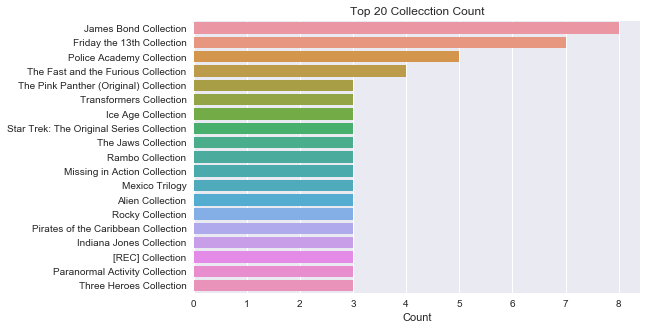

In [11]:
# Bar plot of most frequent values
collections = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0).value_counts()[1:20]
fig = plt.figure(figsize=(8, 5))
sns.barplot(collections, collections.index)
plt.xlabel('Count')
plt.title('Top 20 Collecction Count')
plt.show()

<Figure size 576x360 with 0 Axes>

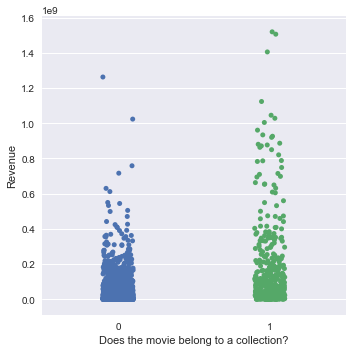

In [12]:
# Show the distribution of revenue for movies with or without a collection
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)
plt.figure(figsize=(8, 5))
sns.catplot(x='has_collection', y='revenue', data=train)
plt.xlabel('Does the movie belong to a collection?')
plt.ylabel('Revenue')
plt.show()

In [13]:
# Show top five columns
for i, e in enumerate(train['genres'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
1 [{'id': 18, 'name': 'Drama'}]
2 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
3 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]
4 [{'id': 16, 'name': 'Animation'}, {'id': 12, 'name': 'Adventure'}, {'id': 10751, 'name': 'Family'}]


2    699
3    649
1    407
4    275
5     69
6     12
0      4
7      2
Name: genres, dtype: int64


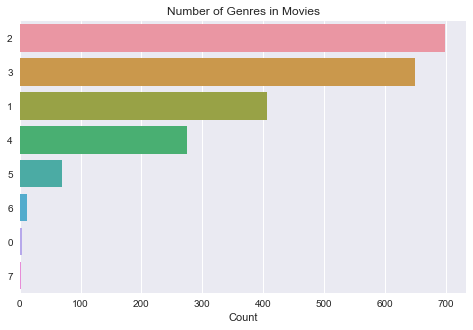

In [14]:
# Return unique value and count, and the frequency bar plot
genres_num = train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()
print(genres_num)
fig = plt.figure(figsize=(8, 5))
sns.barplot(genres_num, genres_num.index, orient="h", order=genres_num.sort_values(ascending = False).index)
plt.xlabel('Count')
plt.title('Number of Genres in Movies')
plt.show()


In [15]:
# Extract genres of each film
genres_per = train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
genres_per

0         [Comedy, Drama, Family, Romance]
1                                  [Drama]
2                        [Thriller, Drama]
3                       [Action, Thriller]
4           [Animation, Adventure, Family]
                       ...                
2112                               [Drama]
2113                     [Comedy, Romance]
2114                        [Drama, Music]
2115    [Crime, Action, Mystery, Thriller]
2116                     [Comedy, Romance]
Name: genres, Length: 2117, dtype: object

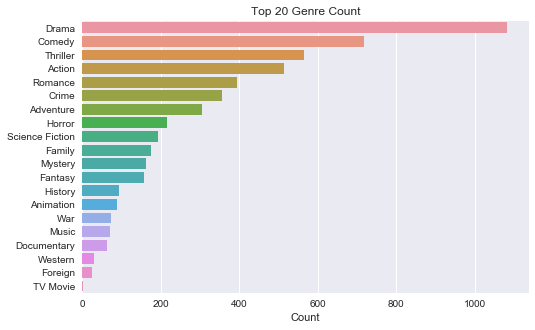

In [16]:
# To show which genre is the most common
genres_count = Counter([i for j in genres_per for i in j]).most_common()
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in genres_count],[val[0] for val in genres_count])
plt.xlabel('Count')
plt.title('Top 20 Genre Count')
plt.show()

In [17]:
# Show top five columns
for i, e in enumerate(train['production_companies'][:5]):
    print(i, e)

0 [{'name': 'Walt Disney Pictures', 'id': 2}]
1 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
2 {}
3 {}
4 {}


1     550
2     514
3     410
4     216
5     123
0     120
6      75
7      40
8      33
9      22
11      5
16      2
12      2
10      1
14      1
15      1
13      1
17      1
Name: production_companies, dtype: int64


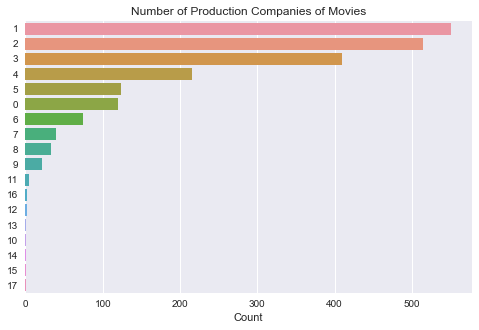

In [18]:
# Unique value and count, visualization
companies_num = train['production_companies'].apply(lambda x: len(x) if x != {} else 0).value_counts()
print(companies_num)
fig = plt.figure(figsize=(8, 5))
sns.barplot(companies_num, companies_num.index, orient="h", order=companies_num.sort_values(ascending = False).index)
plt.xlabel('Count')
plt.title('Number of Production Companies of Movies')
plt.show()

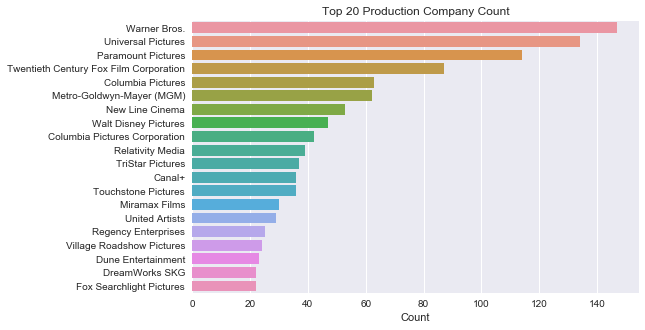

In [19]:
# Show top 20 production company (ranked by number of movies)
companies_per = train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
companies_count = Counter([i for j in companies_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in companies_count],[val[0] for val in companies_count])
plt.xlabel('Count')
plt.title('Top 20 Production Company Count')
plt.show()

In [20]:
# SHow top five columns
for i, e in enumerate(train['production_countries'][:5]):
    print(i, e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'IN', 'name': 'India'}]
3 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
4 {}


In [21]:
# count
countries_num = train['production_countries'].apply(lambda x: len(x) if x != {} else 0).value_counts()
countries_num

1    1575
2     363
3      79
0      45
4      38
5      15
8       1
6       1
Name: production_countries, dtype: int64

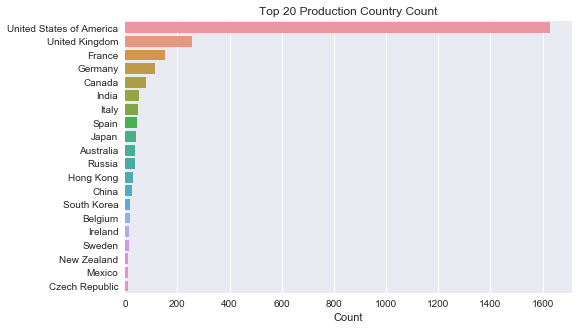

In [22]:
# Show which country produced most movies
countries_per = train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
countries_count = Counter([i for j in countries_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in countries_count],[val[0] for val in countries_count])
plt.xlabel('Count')
plt.title('Top 20 Production Country Count')
plt.show()

In [23]:
# Top 5 columns
for i, e in enumerate(train['spoken_languages'][:5]):
    print(i, e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
3 [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
4 [{'iso_639_1': 'en', 'name': 'English'}]


1    1502
2     390
3     138
4      50
0      16
5      12
7       4
6       3
8       2
Name: spoken_languages, dtype: int64


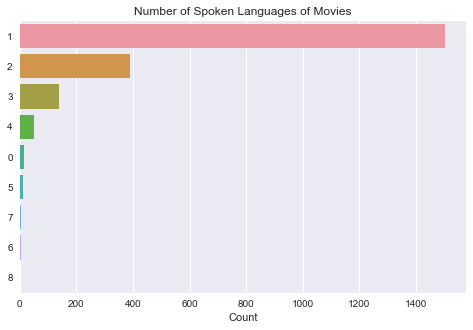

In [24]:
# Unique values and frequency
languages_num = train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0).value_counts()
print(languages_num)
fig = plt.figure(figsize=(8, 5))
sns.barplot(languages_num, languages_num.index, orient="h", order=languages_num.sort_values(ascending = False).index)
plt.xlabel('Count')
plt.title('Number of Spoken Languages of Movies')
plt.show()

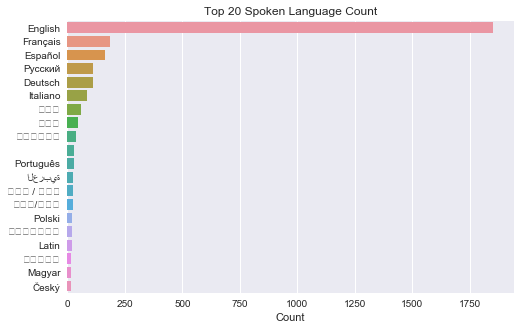

In [25]:
# Show languages which are used frequently
languages_per = train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
languages_count = Counter([i for j in languages_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in languages_count],[val[0] for val in languages_count])
plt.xlabel('Count')
plt.title('Top 20 Spoken Language Count')
plt.show()

In [26]:
train['original_language'].value_counts()[:10]


en    1827
fr      56
es      34
ru      30
hi      27
ja      23
it      19
ko      15
cn      14
zh      13
Name: original_language, dtype: int64

In [27]:
# Show some columns
for i, e in enumerate(train['Keywords'][:5]):
    print(i, e)

0 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
1 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
2 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'nerve gas'}]
3 {}
4 {}


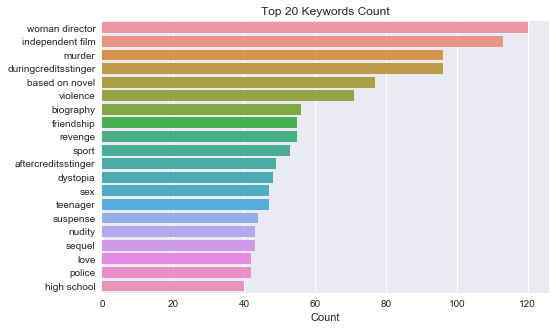

In [28]:
# count and visualize
keywords_per = train['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
keywords_count = Counter([i for j in keywords_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in keywords_count],[val[0] for val in keywords_count])
plt.xlabel('Count')
plt.title('Top 20 Keywords Count')
plt.show()

In [29]:
train['cast'][1][1]

{'cast_id': 6,
 'character': 'Terence Fletcher',
 'credit_id': '52fe4ef7c3a36847f82b3fc7',
 'gender': 2,
 'id': 18999,
 'name': 'J.K. Simmons',
 'order': 1,
 'profile_path': '/jPoNW5fugs5h8AbcE7H5OBm04Tm.jpg'}

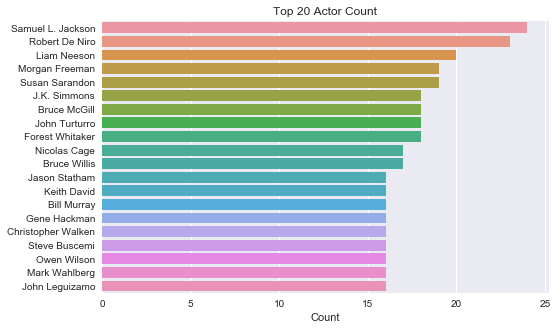

In [30]:
# Most popular actors
cast_per = train['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
cast_count = Counter([i for j in cast_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in cast_count],[val[0] for val in cast_count])
plt.xlabel('Count')
plt.title('Top 20 Actor Count')
plt.show()

In [31]:
train['crew'][0][0]

{'credit_id': '52fe43fe9251416c7502563d',
 'department': 'Directing',
 'gender': 2,
 'id': 1201,
 'job': 'Director',
 'name': 'Garry Marshall',
 'profile_path': '/kx77E8p5rnEmKxIhFT0qWCEMEik.jpg'}

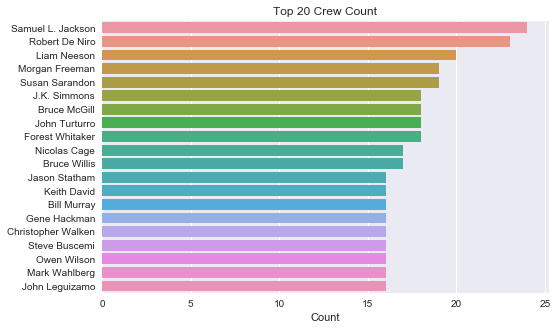

In [32]:
# Show crew who participated in lots of movies
crew_per = train['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
crew_count = Counter([i for j in crew_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in crew_count],[val[0] for val in crew_count])
plt.xlabel('Count')
plt.title('Top 20 Crew Count')
plt.show()

In [33]:
# Show unique value and count
train['homepage'].isna().value_counts()

True     1447
False     670
Name: homepage, dtype: int64

In [34]:
# Ranked by frequency
train['homepage'].value_counts().sort_values(ascending=False)[:5]

http://www.transformersmovie.com/         3
http://www.lordoftherings.net/            2
http://www.blairwitch.com/                1
http://www.thankyouthefilm.com/           1
http://www.meetmonicavelour.com/#/home    1
Name: homepage, dtype: int64

<Figure size 576x360 with 0 Axes>

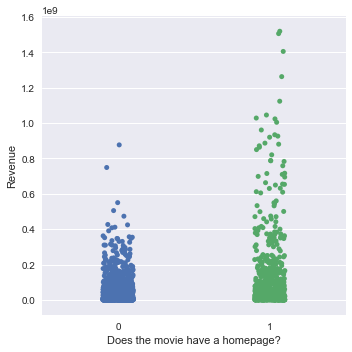

In [35]:
# Show the distribution of revenue
train['has_homepage'] = (1 - train.homepage.isna())
plt.figure(figsize=(8, 5))
sns.catplot(x='has_homepage', y='revenue', data=train)
plt.xlabel('Does the movie have a homepage?')
plt.ylabel('Revenue')
plt.show()

In [36]:
train['status'].value_counts()

Released    2113
Rumored        4
Name: status, dtype: int64

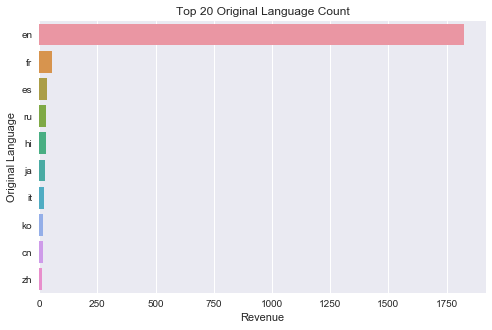

In [37]:
# Show frequency
lang_counts = train['original_language'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(lang_counts[:10],lang_counts[:10].index)
plt.title('Top 20 Original Language Count')
plt.ylabel('Original Language')
plt.xlabel('Revenue')
plt.show()

In [38]:
# Show top 15 languages
train['original_language'].value_counts().head(15)

en    1827
fr      56
es      34
ru      30
hi      27
ja      23
it      19
ko      15
cn      14
zh      13
de      11
ta       8
nl       6
sv       5
pt       4
Name: original_language, dtype: int64

In [39]:
# The percentage of English movies
(train['original_language'] == 'en').mean()

0.863013698630137

<Figure size 576x360 with 0 Axes>

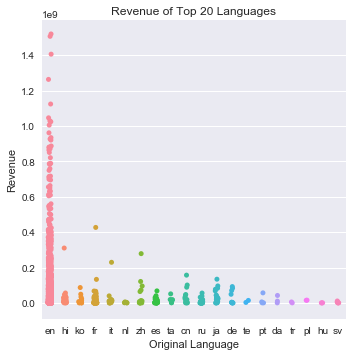

In [40]:
# Show the difference of revenue between movies in different languages
top20_lang = train.loc[train['original_language'].isin(lang_counts[:20].index),:]
plt.figure(figsize=(8, 5))
sns.catplot(x='original_language', y='revenue', data=top20_lang)
plt.title('Revenue of Top 20 Languages')
plt.xlabel('Original Language')
plt.ylabel('Revenue')
plt.show()

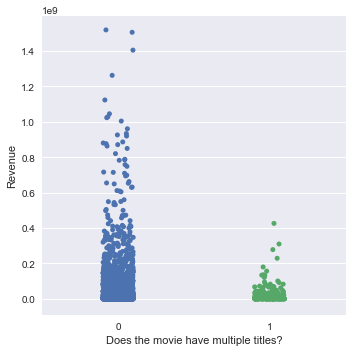

In [41]:
train['is_title_different'] = 1 - (train['original_title'] == train['title'])
sns.catplot(x="is_title_different", y="revenue", data=train)
plt.xlabel('Does the movie have multiple titles?')
plt.ylabel('Revenue')
plt.show()

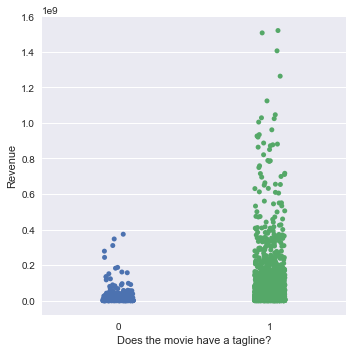

In [42]:
# Does the tagline influence the revenue?
train['has_tagline'] = 1 - train['tagline'].isna()
sns.catplot(x="has_tagline", y="revenue", data=train)
plt.xlabel('Does the movie have a tagline?')
plt.ylabel('Revenue')
plt.show()


In [43]:
# Fixes dates which are in 20xx (they are later than 2020, so all are wrong values)
def fix_date(x):
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

train['release_date'] = train['release_date'].apply(lambda x: fix_date(x))
test['release_date'] = test['release_date'].apply(lambda x: fix_date(x))

# Extract date features
def date_features(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_year'] = df['release_date'].dt.year
    df['release_month'] = df['release_date'].dt.month
    df['release_day'] = df['release_date'].dt.day
    #df['release_quarter'] = df['release_date'].dt.quarter
    df['release_dayofweek'] = df['release_date'].dt.dayofweek
    df.drop(columns=['release_date'], inplace=True)
    return df

train = date_features(train)
test = date_features(test)

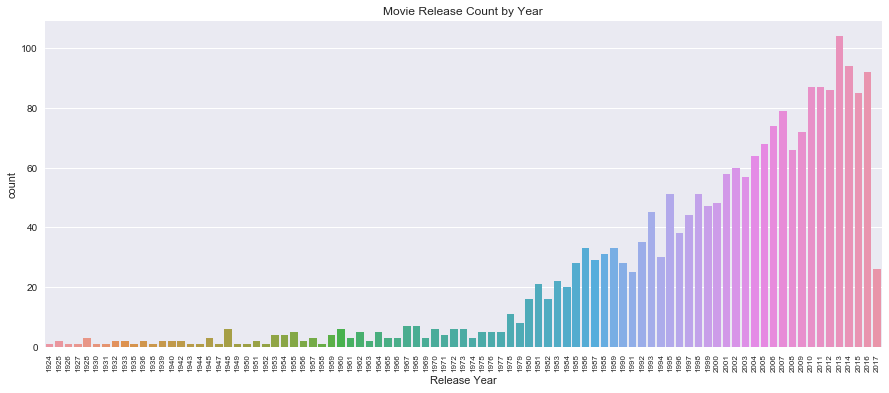

In [44]:
# Number of movies by year
plt.figure(figsize=(15,6))
sns.countplot(train['release_year'].sort_values())
plt.title("Movie Release Count by Year")
plt.xlabel("Release Year")
plt.xticks(fontsize=8, rotation=90)
plt.show()

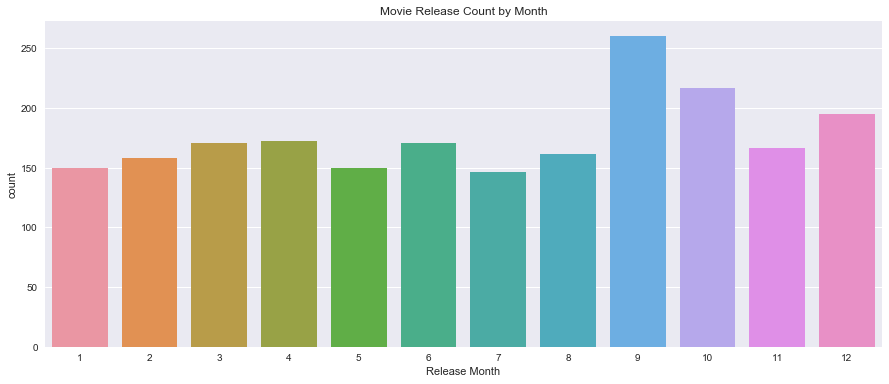

In [45]:
# Number of movies by month
plt.figure(figsize=(15,6))
sns.countplot(train['release_month'].sort_values())
plt.title("Movie Release Count by Month")
plt.xlabel("Release Month")
plt.show()

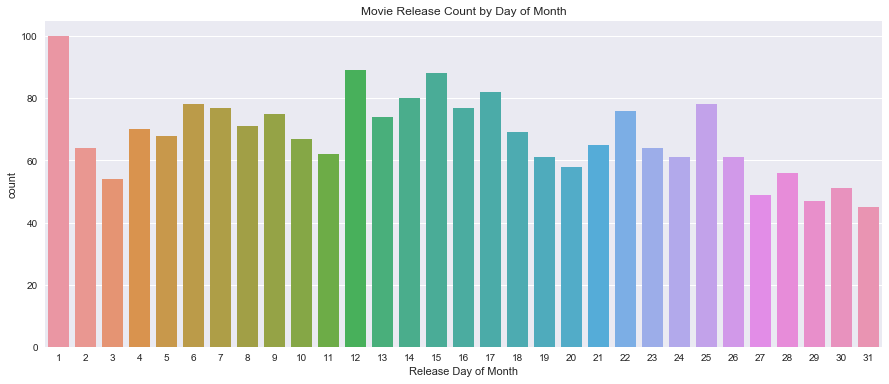

In [46]:
# Number of movies by day of month
plt.figure(figsize=(15,6))
sns.countplot(train['release_day'].sort_values())
plt.title("Movie Release Count by Day of Month")
plt.xlabel("Release Day of Month")
plt.show()

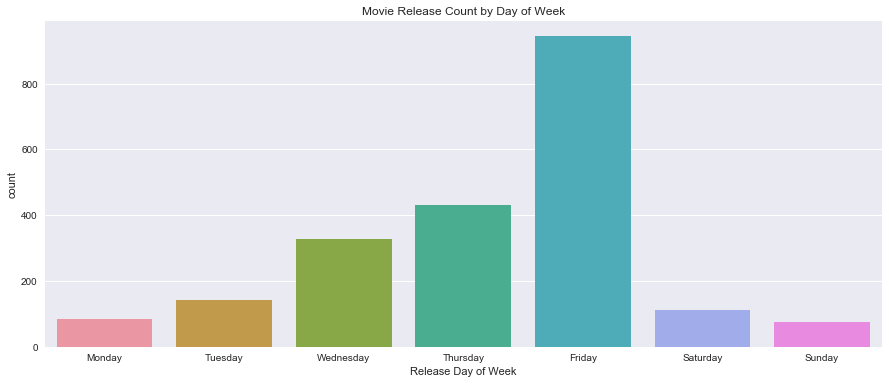

In [47]:
# Number of movies by day of week
plt.figure(figsize=(15,6))
sns.countplot(train['release_dayofweek'].sort_values())
plt.title("Movie Release Count by Day of Week")
plt.xlabel("Release Day of Week")
plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]) # add labels
plt.show()

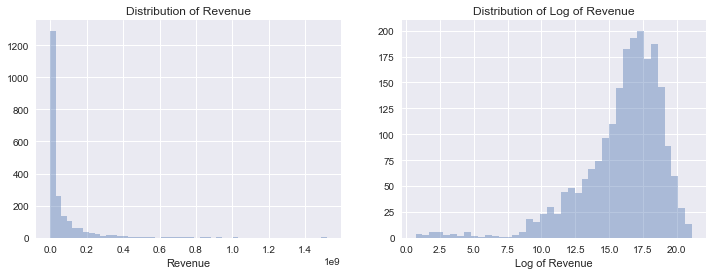

In [48]:
# Distribution of target variable
train['log_revenue'] = np.log1p(train['revenue'])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.distplot(train['revenue'], kde=False)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.subplot(1, 2, 2)
sns.distplot(train['log_revenue'], kde=False)
plt.title('Distribution of Log of Revenue')
plt.xlabel('Log of Revenue')
plt.show()

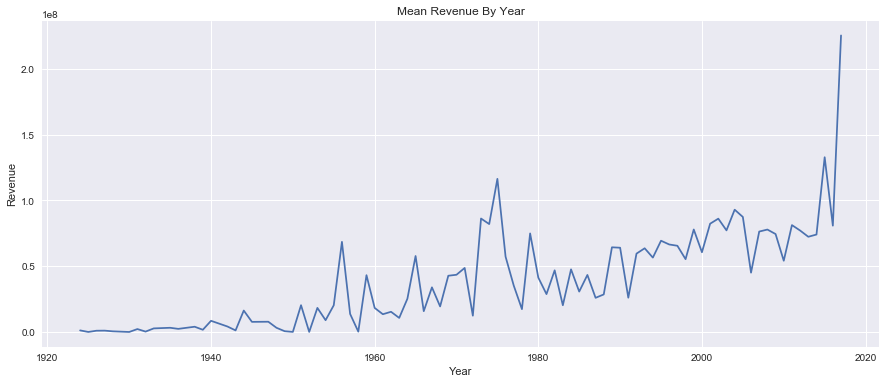

In [49]:
# Mean revenue by year
MeanRevenueByYear = train.groupby('release_year')['revenue'].agg('mean')
MeanRevenueByYear.plot(figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Mean Revenue By Year')
plt.show()

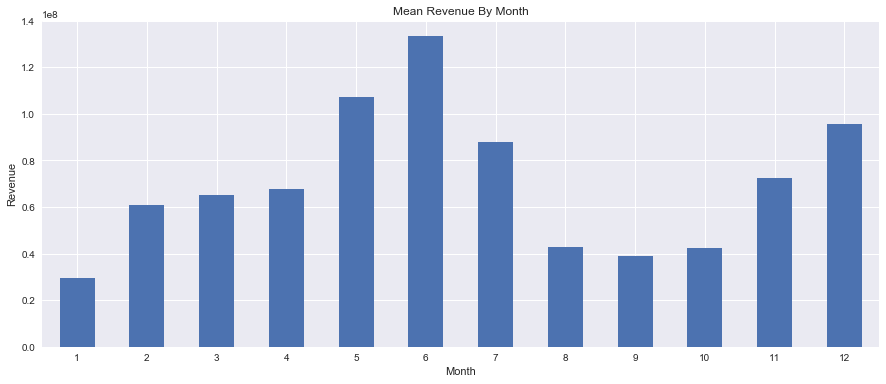

In [50]:
# Mean revenue by month
MeanRevenueByMonth = train.groupby('release_month')['revenue'].agg('mean')
MeanRevenueByMonth.plot(figsize=(15,6), kind='bar')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Mean Revenue By Month')
plt.xticks(rotation=360)
plt.show()

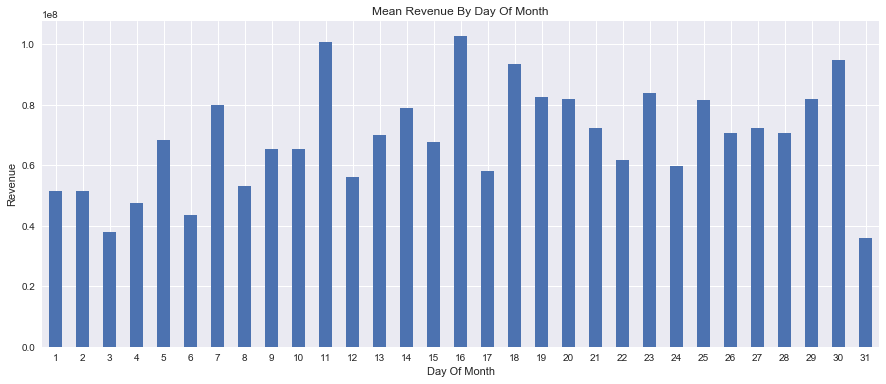

In [51]:
# Mean revenue by day of month
MeanRevenueByDayOfMonth = train.groupby('release_day')['revenue'].agg('mean')
MeanRevenueByDayOfMonth.plot(figsize=(15,6), kind='bar')
plt.xlabel('Day Of Month')
plt.ylabel('Revenue')
plt.title('Mean Revenue By Day Of Month')
plt.xticks(rotation=360)
plt.show()

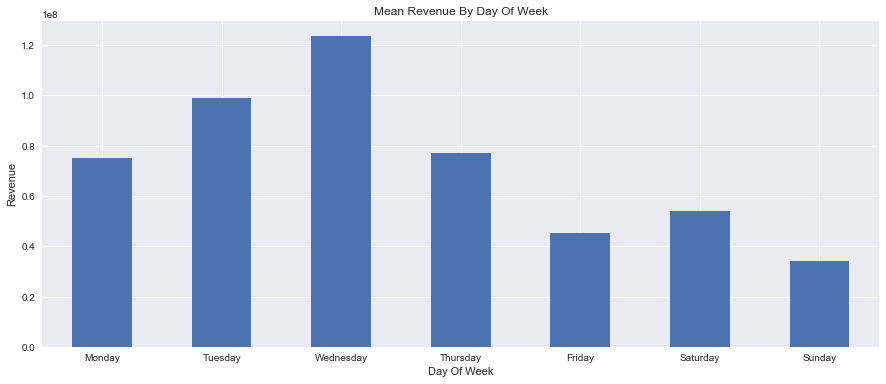

In [52]:
# Mean revenue by day of week
MeanRevenueByDayOfWeek = train.groupby('release_dayofweek')['revenue'].agg('mean')
MeanRevenueByDayOfWeek.plot(figsize=(15,6), kind='bar')
plt.xlabel('Day Of Week')
plt.ylabel('Revenue')
plt.title('Mean Revenue By Day Of Week')
plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.xticks(rotation=360)
plt.show()

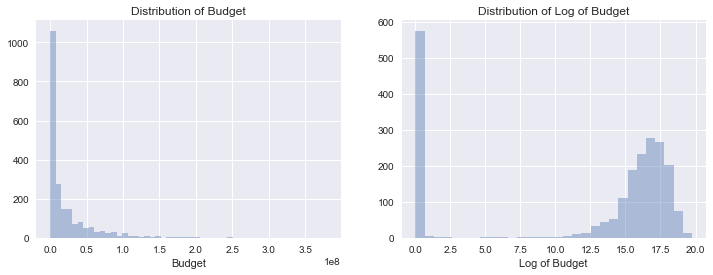

In [53]:
# Distribution of budget
train['log_budget'] = np.log1p(train['budget'])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.distplot(train['budget'], kde=False)
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.subplot(1, 2, 2)
sns.distplot(train['log_budget'], bins=30, kde=False)
plt.title('Distribution of Log of Budget')
plt.xlabel('Log of Budget')
plt.show()

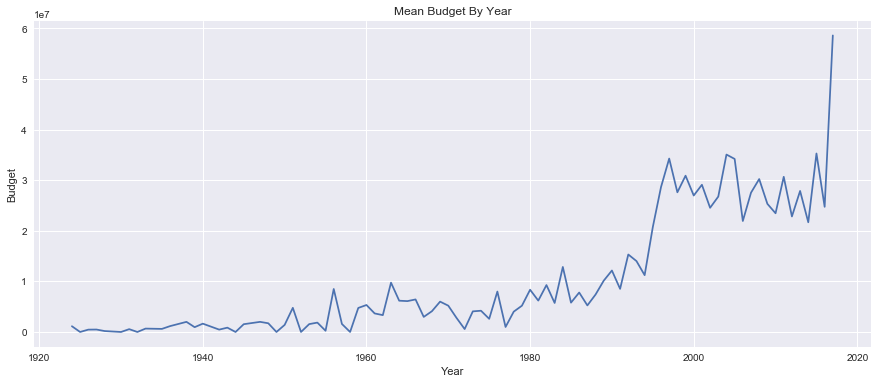

In [54]:
# Mean budget by year
MeanBudgetByYear = train.groupby('release_year')['budget'].agg('mean')
MeanBudgetByYear.plot(figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Budget')
plt.title('Mean Budget By Year')
plt.show()

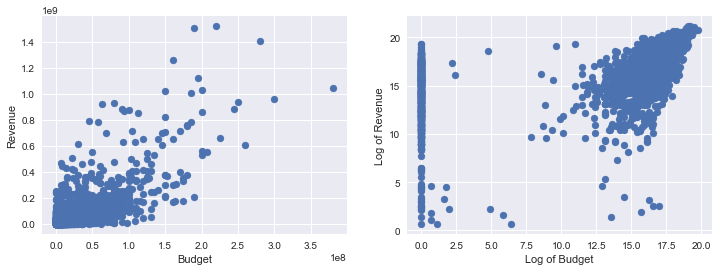

In [55]:
# Relationship between budget and revenue
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x='budget', y='revenue', data=train)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.subplot(1, 2, 2)
plt.scatter(x='log_budget', y='log_revenue', data=train)
plt.xlabel('Log of Budget')
plt.ylabel('Log of Revenue')
plt.show()


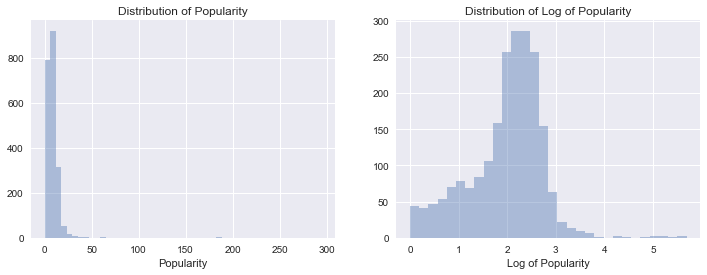

In [56]:
# Distribution of popularity
train['log_popularity'] = np.log1p(train['popularity'])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.distplot(train['popularity'], kde=False)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.subplot(1, 2, 2)
sns.distplot(train['log_popularity'], bins=30, kde=False)
plt.title('Distribution of Log of Popularity')
plt.xlabel('Log of Popularity')
plt.show()

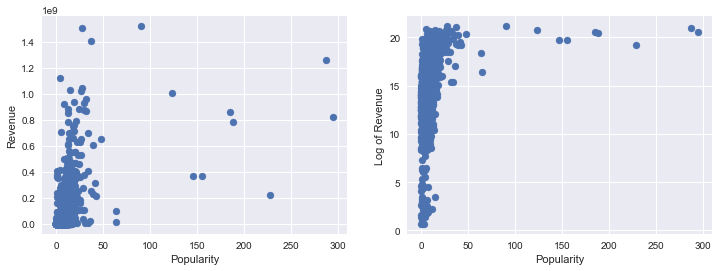

In [57]:
# Relationship between popularity and revenue
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x='popularity', y='revenue', data=train)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.subplot(1, 2, 2)
plt.scatter(x='popularity', y='log_revenue', data=train)
plt.xlabel('Popularity')
plt.ylabel('Log of Revenue')
plt.show()

In [58]:
#Replacing the NaN with 0 values
train['runtime'] = train['runtime'].fillna(0)

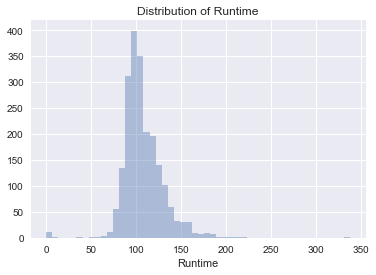

In [59]:
# Distribution of runtime
sns.distplot(train['runtime'], kde=False)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime')
plt.show()

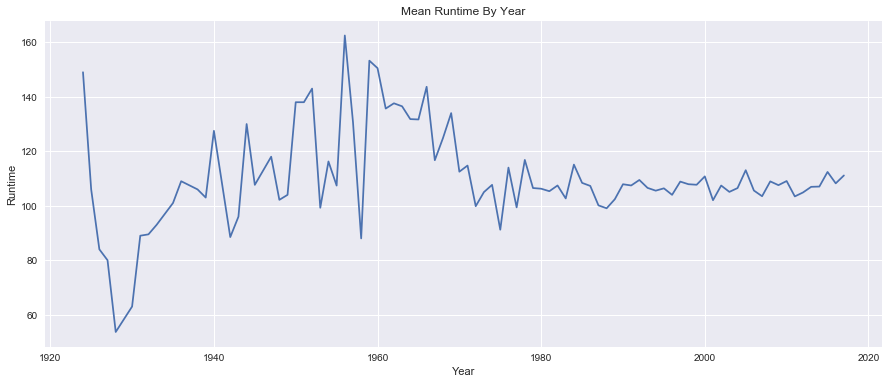

In [60]:
# Mean runtime by year
MeanRuntimeByYear = train.groupby('release_year')['runtime'].agg('mean')
MeanRuntimeByYear.plot(figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.title('Mean Runtime By Year')
plt.show()

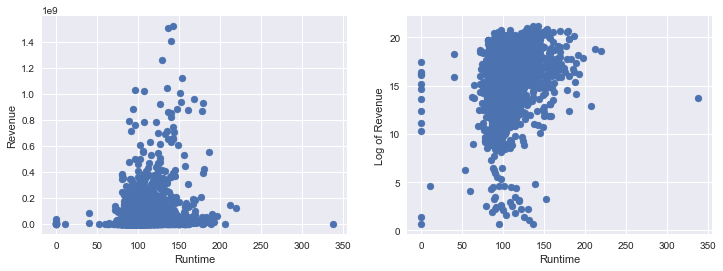

In [61]:
# Relationship between runtime and revenue
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x='runtime', y='revenue', data=train)
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.subplot(1, 2, 2)
plt.scatter(x='runtime', y='log_revenue', data=train)
plt.xlabel('Runtime')
plt.ylabel('Log of Revenue')
plt.show()

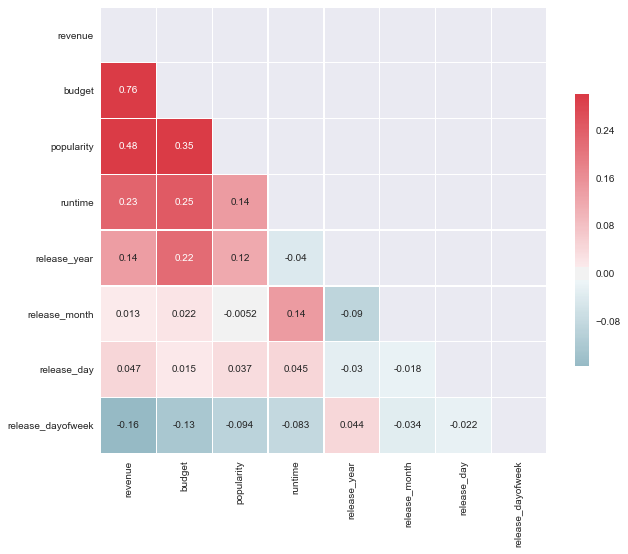

In [62]:
num_vars = ['revenue','budget','popularity','runtime','release_year','release_month','release_day','release_dayofweek']
mask = np.zeros_like(train[num_vars].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[num_vars].corr(), annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [63]:
def prepare_data(df):
    
    # belongs to collection
    
    df['has_collection'] = df['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)
    
    # homepage
    
    df['has_homepage'] = 1 - df['homepage'].isna()
    
    # status
    
    df['is_released'] = (df['status'] == 'Released')*1
       
    # original title
    
    df['original_title_letter_count'] = df['original_title'].str.len() 
    df['original_title_word_count'] = df['original_title'].str.split().str.len()
    
    # title
    
    df['title_letter_count'] = df['title'].str.len() 
    df['title_word_count'] = df['title'].str.split().str.len()
    
    # overview
    
    df['overview_letter_count'] = df['overview'].str.len() 
    df['overview_word_count'] = df['overview'].str.split().str.len()
    
    # tagline
    
    df['has_tagline'] = 1 - df['tagline'].isna()
    df['tagline_letter_count'] = df['tagline'].str.len()
    df['tagline_word_count'] = df['tagline'].str.split().str.len()
    
    # gender of cast
    
    df['genders_0_cast'] = df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    df['genders_1_cast'] = df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    df['genders_2_cast'] = df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
    
    # gender of crew
    
    df['genders_0_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    df['genders_1_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    df['genders_2_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
    
    # log
    
    df['log_budget'] = np.log1p(df['budget'])
    df['log_popularity'] = np.log1p(df['popularity'])
    
    # create new features about budget
        
    df['ratio_budget_runtime'] = (df['log_budget'] / df['runtime']).replace([np.inf,-np.inf,np.nan],0)
    df['ratio_budget_popularity'] = df['log_budget'] / df['log_popularity']
    df['ratio_budget_year'] = df['log_budget'] / df['release_year'] #
    df['budget_to_mean_year'] = df['log_budget'] / df.groupby('release_year')['log_budget'].transform('mean')
    
    # create new features about popularity
    
    df['ratio_popularity_year'] = df['log_popularity'] / df['release_year']
    df['popularity_to_mean_year'] = df['log_popularity'] / df.groupby('release_year')['log_popularity'].transform('mean')
    
    # create new features about runtime
    
    df['ratio_runtime_year'] = df['runtime'] / df['release_year']
    df['runtime_to_mean_year'] = df['runtime'] / df.groupby('release_year')['runtime'].transform('mean')
                 
    # fill in null values
    
    df.fillna(value=0.0, inplace = True)
    
    return df


In [64]:
train = prepare_data(train)
test = prepare_data(test)

In [65]:
# Process dist columns, create dummy variables for values with high frequency

def dist_processing(train, test, col, key): # cast character, crew job/department?
        
    value_list = train[col].apply(lambda x: [i[key] for i in x] if x != {} else [])
    value_count = Counter([i for j in value_list for i in j]).most_common()
    top_list = [m[0] for m in value_count if m[1] > 10] # regard freq>10 as high frequency
        
    train['num_' + col] = train[col].apply(lambda x: len(x) if x != {} else 0)
    train['all_' + col] = train[col].apply(lambda x: ' '.join(sorted([i[key] for i in x])) if x != {} else '')
    test['num_' + col] = test[col].apply(lambda x: len(x) if x != {} else 0)
    test['all_' + col] = test[col].apply(lambda x: ' '.join(sorted([i[key] for i in x])) if x != {} else '')
    
    for p in top_list:
        train[col + '_' + p] = train['all_' + col].apply(lambda x: 1 if p in x else 0)
        test[col + '_' + p] = test['all_' + col].apply(lambda x: 1 if p in x else 0)
    
    train = train.drop([col, 'all_' + col], axis=1)
    test = test.drop([col, 'all_' + col], axis=1)
    
    return train, test
    
text_cols = ['genres', 'production_companies', 'production_countries', 'Keywords', 'cast', 'crew']
    
for col in text_cols:
    train, test = dist_processing(train, test, col, 'name')
    
train, test = dist_processing(train, test, 'spoken_languages', 'iso_639_1')
              
# original language
    
value_count = Counter(train['original_language']).most_common()
top_list = [m[0] for m in value_count if m[1] > 10]

for p in top_list: 
    train['original_language_' + p] = train['original_language'].apply(lambda x: 1 if p in x else 0)
    test['original_language_' + p] = test['original_language'].apply(lambda x: 1 if p in x else 0)

In [66]:
# Delete useless columns
train = train.drop(['id', 'belongs_to_collection', 'homepage', 'status', 'original_language', 'original_title', 'title', 'overview',
                    'tagline', 'imdb_id', 'poster_path', 'budget', 'popularity', 'revenue', 'is_title_different'], axis=1)
test = test.drop(['id', 'belongs_to_collection', 'homepage', 'status', 'original_language', 'original_title', 'title', 'overview',
                  'tagline', 'imdb_id', 'poster_path', 'budget', 'popularity'], axis=1)

In [67]:
# Remove non-ASCII characters in feature names (for lightGBM)
newnames = []
for col in train.columns.values:
    encoded_string = col.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    newnames.append(decode_string)
train.columns = newnames

newnames = []
for col in test.columns.values:
    encoded_string = col.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    newnames.append(decode_string)
test.columns = newnames

In [68]:
# Check the number of columns in two data sets
print(train.shape)
print(test.shape)

(2117, 611)
(883, 611)


In [69]:
X = train.drop(['log_revenue'], axis=1)
y = train['log_revenue']

# Make the order of features consistent (for XGBoost)
X_col = list(X.columns)
test = test.loc[:,X_col]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=22)

In [70]:
# Use 10-fold cross-validation
n_fold = 10
folds = list(KFold(n_splits=n_fold, shuffle=True, random_state=22).split(X))

In [71]:
def models(X_train, X_valid, y_train, y_valid, test, model_type, params, plot_feature_importance=False):

    pred = np.zeros(test.shape[0])
    val_pred = np.zeros(X_valid.shape[0])
    scores = []
    feature_importance = pd.DataFrame()

    for fold_n, (train_index, valid_index) in enumerate(folds):
        
        print('Fold', fold_n, 'started at', time.ctime())
        X_train = X.loc[train_index,:]
        y_train = y[train_index]
        X_valid = X.loc[valid_index,:]
        y_valid = y[valid_index] 
    
        # lightGBM model
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators=20000, nthread=4)
            model.fit(X_train, y_train,
                      eval_set=[(X_train, y_train), (X_valid, y_valid)],
                      eval_metric='rmse',
                      verbose=False,
                      early_stopping_rounds=200)

            y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration_)
            y_pred = model.predict(test, num_iteration=model.best_iteration_)
            
              
        # XGBoost model 
        
        if model_type == 'xgb':
            
            model = xgb.XGBRegressor(**params, n_estimators = 20000)
            model.fit(X_train, y_train,
                    eval_set=[(X_train, y_train), (X_valid, y_valid)],
                    eval_metric='rmse',
                    verbose=False,
                    early_stopping_rounds=200)

            y_pred_valid = model.predict(X_valid, ntree_limit = model.best_ntree_limit)
            y_pred = model.predict(test, ntree_limit = model.best_ntree_limit)
            
        # CatBoost model  
        
        if model_type == 'cat':
            
            model = CatBoostRegressor(**params, iterations=20000, eval_metric = 'RMSE')
            model.fit(X_train, y_train, 
                      eval_set=(X_valid, y_valid), 
                      use_best_model=True, 
                      verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(test)
        
        # Record scores
        
        scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5) # RMSE for valid
        pred += y_pred
        
            
    pred /= n_fold
    print('Mean RMSE: {0:.5f}, std: {1:.5f}.'.format(np.mean(scores), np.std(scores)))
    
        
        
    
    return pred,np.mean(scores)

In [72]:
# Best parameters by grid search
lgb_params = {'metric': 'rmse',

              'verbosity': -1}
start = time.time()
lgb_pred,lgb_rmse = models(X_train, X_valid, y_train, y_valid, test, 'lgb', lgb_params, True)
end = time.time()
time_lgb= (end-start)/60
print('Time elapsed: {0:.2f} m'.format(time_lgb))

Fold 0 started at Wed Jan 13 09:50:59 2021
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
Fold 1 started at Wed Jan 13 09:51:00 2021
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
Fold 2 started at Wed Jan 13 09:51:01 2021
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
Fold 3 started at Wed Jan 13 09:51:01 2021
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
Fold 4 started at Wed Jan 13 09:51:02 2021
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
Fold 5 started at Wed Jan 13 09:51:03 2021
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
Fold 6 started at Wed Jan 13 09:51:04 2021
[LightGBM] [Warning] 

In [73]:
# Best parameters by grid search
xgb_params = {'objective': 'reg:squarederror',
              'eval_metric': 'rmse',
              'seed': 22}
start = time.time()
xgb_pred,xgb_rmse = models(X_train, X_valid, y_train, y_valid, test, 'xgb', xgb_params, True)
end = time.time()
time_xgb= (end-start)/60
print('Time elapsed: {0:.2f} m'.format(time_xgb))

Fold 0 started at Wed Jan 13 09:51:06 2021
Fold 1 started at Wed Jan 13 09:51:09 2021
Fold 2 started at Wed Jan 13 09:51:11 2021
Fold 3 started at Wed Jan 13 09:51:13 2021
Fold 4 started at Wed Jan 13 09:51:16 2021
Fold 5 started at Wed Jan 13 09:51:18 2021
Fold 6 started at Wed Jan 13 09:51:20 2021
Fold 7 started at Wed Jan 13 09:51:23 2021
Fold 8 started at Wed Jan 13 09:51:25 2021
Fold 9 started at Wed Jan 13 09:51:28 2021
Mean RMSE: 2.26162, std: 0.24881.
Time elapsed: 0.39 m


In [74]:
# Best parameters by grid search
cat_params = {
              'random_seed': 22,
              'early_stopping_rounds': 200
             }
start = time.time()
cat_pred,cat_rmse = models(X_train, X_valid, y_train, y_valid, test, 'cat', cat_params, True)
end = time.time()
time_cat= (end-start)/60
print('Time elapsed: {0:.2f} m'.format(time_cat))

Fold 0 started at Wed Jan 13 09:51:30 2021
Fold 1 started at Wed Jan 13 09:51:44 2021
Fold 2 started at Wed Jan 13 09:51:59 2021
Fold 3 started at Wed Jan 13 09:52:14 2021
Fold 4 started at Wed Jan 13 09:52:31 2021
Fold 5 started at Wed Jan 13 09:52:58 2021
Fold 6 started at Wed Jan 13 09:53:07 2021
Fold 7 started at Wed Jan 13 09:53:18 2021
Fold 8 started at Wed Jan 13 09:53:35 2021
Fold 9 started at Wed Jan 13 09:53:57 2021
Mean RMSE: 2.06586, std: 0.24257.
Time elapsed: 2.56 m


In [75]:
compare_test = pd.read_csv("test_used.csv")

print("First index from actual revenue :",compare_test['revenue'][0])
print("LGB Result:","\nRMSE:",lgb_rmse,"\nTime lapse:",time_lgb,"m")
print("First index from lgb predicted revenue :",np.expm1(lgb_pred)[0])
print("\nXGB Result:","\nRMSE:",xgb_rmse,"\nTime lapse:",time_xgb,"m")
print("First index from xgb predicted revenue :",np.expm1(xgb_pred)[0])
print("\nCat Result:","\nRMSE:",cat_rmse,"\nTime lapse:",time_cat,"m")
print("First index from cat predicted revenue :",np.expm1(cat_pred)[0])

First index from actual revenue : 12314651
LGB Result: 
RMSE: 2.1488478136518814 
Time lapse: 0.12172400156656901 m
First index from lgb predicted revenue : 65494540.07591968

XGB Result: 
RMSE: 2.261619800046736 
Time lapse: 0.39024646679560343 m
First index from xgb predicted revenue : 54721420.47043059

Cat Result: 
RMSE: 2.065858452200865 
Time lapse: 2.564972909291585 m
First index from cat predicted revenue : 64108658.2239646
